In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

In [2]:
a = np.array([[0,1],[1,0]])
b = np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        
        f =  ((1-detTAa)**2)*k_p + tB_con**2
        
        
        return f 

In [3]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': 0
    
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,0,0,1]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

In [4]:
epochs= 40
history_book = experiment.evolve( epochs, prints_p=5)

temp:4|epoch:0|change:800000064775.0074|value:639999872000.0067
temp:4|epoch:5|change:5120063935975.041|value:639999872000.0067
temp:4|epoch:10|change:5120005369600.05|value:639999872000.0067
temp:4|epoch:15|change:1921496293824.02|value:639999872000.0067
temp:4|epoch:20|change:12346834161511.14|value:639999872000.0067
temp:4|epoch:25|change:12320526990016.115|value:639999872000.0067
temp:4|epoch:30|change:998.99951171875|value:639999872000.0067
temp:4|epoch:35|change:26405293225191.266|value:639999872000.0067
temp:0.0975609756097561|epoch:0|change:5120454145375.048|value:639999872000.0067
temp:0.0975609756097561|epoch:5|change:12320702430400.115|value:639999872000.0067
temp:0.0975609756097561|epoch:10|change:5120002941031.048|value:639999872000.0067
temp:0.0975609756097561|epoch:15|change:4092479424.000366|value:639999872000.0067
temp:0.0975609756097561|epoch:20|change:15362551172199.154|value:639999872000.0067
temp:0.0975609756097561|epoch:25|change:26400524174016.24|value:6399998720

temp:0.007677543186180423|epoch:35|change:3839999232000.036|value:160009759199.00168
temp:0.007130124777183602|epoch:0|change:40831579795425.414|value:160009759199.00168
temp:0.007130124777183602|epoch:5|change:7680443842176.08|value:160009759199.00168
temp:0.007130124777183602|epoch:10|change:26879984832801.285|value:160009759199.00168
temp:0.007130124777183602|epoch:15|change:7860844660776.073|value:160009759199.00168
temp:0.007130124777183602|epoch:20|change:5654620427776.053|value:160009759199.00168
temp:0.007130124777183602|epoch:25|change:1416881659425.0059|value:160009759199.00168
temp:0.007130124777183602|epoch:30|change:15852085330401.148|value:160009759199.00168
temp:0.007130124777183602|epoch:35|change:26906821458312.273|value:160009759199.00168
temp:0.006655574043261232|epoch:0|change:1279990177576.0142|value:160009759199.00168
temp:0.006655574043261232|epoch:5|change:27427371362337.273|value:160009759199.00168
temp:0.006655574043261232|epoch:10|change:17814542624.99997|val

temp:0.0035682426404995546|epoch:5|change:7866835056512.087|value:999.0
temp:0.0035682426404995546|epoch:10|change:644092350425.0071|value:999.0
temp:0.0035682426404995546|epoch:15|change:1441332401976.0159|value:999.0
temp:0.0035682426404995546|epoch:20|change:2566238243000.0234|value:999.0
temp:0.0035682426404995546|epoch:25|change:10240007742200.121|value:999.0
temp:0.0035682426404995546|epoch:30|change:5767297749792.057|value:999.0
temp:0.0035682426404995546|epoch:35|change:5759998855992.072|value:999.0
temp:0.0034453057708871667|epoch:0|change:5774752727352.05|value:999.0
temp:0.0034453057708871667|epoch:5|change:12967296309792.146|value:999.0
temp:0.0034453057708871667|epoch:10|change:12960702301401.154|value:999.0
temp:0.0034453057708871667|epoch:15|change:10240805343800.092|value:999.0
temp:0.0034453057708871667|epoch:20|change:5760002812032.052|value:999.0
temp:0.0034453057708871667|epoch:25|change:7856750686976.074|value:999.0
temp:0.0034453057708871667|epoch:30|change:783999

temp:0.0023242300987797795|epoch:10|change:16099876820000.184|value:999.0
temp:0.0023242300987797795|epoch:15|change:16001866351577.135|value:999.0
temp:0.0023242300987797795|epoch:20|change:12960275912217.127|value:999.0
temp:0.0023242300987797795|epoch:25|change:23601834214776.22|value:999.0
temp:0.0023242300987797795|epoch:30|change:4004091678425.0366|value:999.0
temp:0.0023242300987797795|epoch:35|change:4035105241817.047|value:999.0
temp:0.0022714366837024423|epoch:0|change:12972095696601.117|value:999.0
temp:0.0022714366837024423|epoch:5|change:18560223385625.203|value:999.0
temp:0.0022714366837024423|epoch:10|change:12980119408857.117|value:999.0
temp:0.0022714366837024423|epoch:15|change:5760329141376.076|value:999.0
temp:0.0022714366837024423|epoch:20|change:10241673298976.092|value:999.0
temp:0.0022714366837024423|epoch:25|change:12960101631672.127|value:999.0
temp:0.0022714366837024423|epoch:30|change:2585014574976.0186|value:999.0
temp:0.0022714366837024423|epoch:35|change:

temp:0.0017536168347216138|epoch:30|change:0.0|value:999.0
temp:0.0017536168347216138|epoch:35|change:4036965085112.0376|value:999.0
temp:0.0017233950883239987|epoch:0|change:5776751102976.061|value:999.0
temp:0.0017233950883239987|epoch:5|change:27048483318776.266|value:999.0
temp:0.0017233950883239987|epoch:10|change:7873315705376.087|value:999.0
temp:0.0017233950883239987|epoch:15|change:23039995615776.254|value:999.0
temp:0.0017233950883239987|epoch:20|change:1543935671001.0105|value:999.0
temp:0.0017233950883239987|epoch:25|change:16005751039001.146|value:999.0
temp:0.0017233950883239987|epoch:30|change:12971295866232.154|value:999.0
temp:0.0017233950883239987|epoch:35|change:27099888685952.273|value:999.0
temp:0.0016941973739940707|epoch:0|change:10280904204800.107|value:999.0
temp:0.0016941973739940707|epoch:5|change:6019851118617.057|value:999.0
temp:0.0016941973739940707|epoch:10|change:12961179967257.146|value:999.0
temp:0.0016941973739940707|epoch:15|change:16000011184601.17

temp:0.0013884068031933359|epoch:15|change:5760611322912.07|value:999.0
temp:0.0013884068031933359|epoch:20|change:13153653486072.135|value:999.0
temp:0.0013884068031933359|epoch:25|change:160000542425.00168|value:999.0
temp:0.0013884068031933359|epoch:30|change:640000446425.0057|value:999.0
temp:0.0013884068031933359|epoch:35|change:12960190813401.117|value:999.0
temp:0.0013693940431359125|epoch:0|change:23040001784601.234|value:999.0
temp:0.0013693940431359125|epoch:5|change:23058942449976.254|value:999.0
temp:0.0013693940431359125|epoch:10|change:7839998655776.079|value:999.0
temp:0.0013693940431359125|epoch:15|change:23220851378976.26|value:999.0
temp:0.0013693940431359125|epoch:20|change:27066831216512.246|value:999.0
temp:0.0013693940431359125|epoch:25|change:23040009776601.227|value:999.0
temp:0.0013693940431359125|epoch:30|change:5868113033592.076|value:999.0
temp:0.0013693940431359125|epoch:35|change:12975726685977.121|value:999.0
temp:0.0013508949679162446|epoch:0|change:2707

temp:0.001136040897472309|epoch:5|change:5947172829657.065|value:999.0
temp:0.001136040897472309|epoch:10|change:16671171352601.172|value:999.0
temp:0.001136040897472309|epoch:15|change:702663544601.0071|value:999.0
temp:0.001136040897472309|epoch:20|change:40983968007800.44|value:999.0
temp:0.001136040897472309|epoch:25|change:1440000934776.0146|value:999.0
temp:0.001136040897472309|epoch:30|change:16008485526776.152|value:999.0
temp:0.001136040897472309|epoch:35|change:27043099651832.305|value:999.0
temp:0.0011232799775344005|epoch:0|change:5760027042777.057|value:999.0
temp:0.0011232799775344005|epoch:5|change:10361404998425.121|value:999.0
temp:0.0011232799775344005|epoch:10|change:5763103907832.065|value:999.0
temp:0.0011232799775344005|epoch:15|change:12980119408857.117|value:999.0
temp:0.0011232799775344005|epoch:20|change:5761674194976.057|value:999.0
temp:0.0011232799775344005|epoch:25|change:7876964317112.093|value:999.0
temp:0.0011232799775344005|epoch:30|change:576001323260

temp:0.0009801519235481493|epoch:25|change:10240048076825.107|value:999.0
temp:0.0009801519235481493|epoch:30|change:16000006590200.16|value:999.0
temp:0.0009801519235481493|epoch:35|change:642554115200.0071|value:999.0
temp:0.0009706381946129574|epoch:0|change:1441332401976.0159|value:999.0
temp:0.0009706381946129574|epoch:5|change:12972095696601.137|value:999.0
temp:0.0009706381946129574|epoch:10|change:12968486134776.121|value:999.0
temp:0.0009706381946129574|epoch:15|change:27040077452057.246|value:999.0
temp:0.0009706381946129574|epoch:20|change:4000611674912.0376|value:999.0
temp:0.0009706381946129574|epoch:25|change:640388857625.0087|value:999.0
temp:0.0009706381946129574|epoch:30|change:16002551043200.16|value:999.0
temp:0.0009706381946129574|epoch:35|change:23040325685376.227|value:999.0
temp:0.0009613073780341257|epoch:0|change:16000155840800.146|value:999.0
temp:0.0009613073780341257|epoch:5|change:2560082348057.0303|value:999.0
temp:0.0009613073780341257|epoch:10|change:160

temp:0.0008545182653279207|epoch:10|change:13019891501952.14|value:999.0
temp:0.0008545182653279207|epoch:15|change:23094626729976.227|value:999.0
temp:0.0008545182653279207|epoch:20|change:23040325685376.234|value:999.0
temp:0.0008545182653279207|epoch:25|change:3999999200000.045|value:999.0
temp:0.0008545182653279207|epoch:30|change:27039996892697.293|value:999.0
temp:0.0008545182653279207|epoch:35|change:16000609274912.146|value:999.0
temp:0.0008472781190425751|epoch:0|change:10321349094425.113|value:999.0
temp:0.0008472781190425751|epoch:5|change:16012936647200.205|value:999.0
temp:0.0008472781190425751|epoch:10|change:27040187997401.246|value:999.0
temp:0.0008472781190425751|epoch:15|change:16000327093376.146|value:999.0
temp:0.0008472781190425751|epoch:20|change:640009662200.0062|value:999.0
temp:0.0008472781190425751|epoch:25|change:12988356603417.121|value:999.0
temp:0.0008472781190425751|epoch:30|change:1440704605401.0159|value:999.0
temp:0.0008472781190425751|epoch:35|change:

temp:0.0007574323044877859|epoch:10|change:16000804191800.152|value:999.0
temp:0.0007574323044877859|epoch:15|change:640049996825.0062|value:999.0
temp:0.0007574323044877859|epoch:20|change:5872415981337.059|value:999.0
temp:0.0007574323044877859|epoch:25|change:27044463342776.273|value:999.0
temp:0.0007574323044877859|epoch:30|change:1440000934776.0146|value:999.0
temp:0.0007574323044877859|epoch:35|change:16012936647200.18|value:999.0
temp:0.000751738395038526|epoch:0|change:16000046924825.172|value:999.0
temp:0.000751738395038526|epoch:5|change:847123740800.0068|value:999.0
temp:0.000751738395038526|epoch:10|change:27042302680601.285|value:999.0
temp:0.000751738395038526|epoch:15|change:27041040073472.273|value:999.0
temp:0.000751738395038526|epoch:20|change:16007295701792.152|value:999.0
temp:0.000751738395038526|epoch:25|change:7843738911776.093|value:999.0
temp:0.000751738395038526|epoch:30|change:5764467598776.065|value:999.0
temp:0.000751738395038526|epoch:35|change:13160302501

temp:0.0006801564359802748|epoch:15|change:16121403846425.16|value:999.0
temp:0.0006801564359802748|epoch:20|change:160159008800.00143|value:999.0
temp:0.0006801564359802748|epoch:25|change:16000275304217.164|value:999.0
temp:0.0006801564359802748|epoch:30|change:12959999708697.145|value:999.0
temp:0.0006801564359802748|epoch:35|change:23039995615776.254|value:999.0
temp:0.0006755615605472042|epoch:0|change:12975726685977.127|value:999.0
temp:0.0006755615605472042|epoch:5|change:3065698283000.0225|value:999.0
temp:0.0006755615605472042|epoch:10|change:16146236214200.188|value:999.0
temp:0.0006755615605472042|epoch:15|change:5760001148697.052|value:999.0
temp:0.0006755615605472042|epoch:20|change:16006750039001.152|value:999.0
temp:0.0006755615605472042|epoch:25|change:16000804191800.172|value:999.0
temp:0.0006755615605472042|epoch:30|change:5947172829657.052|value:999.0
temp:0.0006755615605472042|epoch:35|change:16000804191800.172|value:999.0
temp:0.000671028350947827|epoch:0|change:12

temp:0.0006210215804999219|epoch:35|change:12960025602777.158|value:999.0
temp:0.0006171887054466898|epoch:0|change:5760019275552.057|value:999.0
temp:0.0006171887054466898|epoch:5|change:2560049612825.023|value:999.0
temp:0.0006171887054466898|epoch:10|change:27261276776312.266|value:999.0
temp:0.0006171887054466898|epoch:15|change:23062630333401.234|value:999.0
temp:0.0006171887054466898|epoch:20|change:27040015019552.266|value:999.0
temp:0.0006171887054466898|epoch:25|change:23040033377976.254|value:999.0
temp:0.0006171887054466898|epoch:30|change:13228131693312.145|value:999.0
temp:0.0006171887054466898|epoch:35|change:3999999200000.039|value:999.0
temp:0.0006134028523232628|epoch:0|change:7840036417976.079|value:999.0
temp:0.0006134028523232628|epoch:5|change:12960001372032.137|value:999.0
temp:0.0006134028523232628|epoch:10|change:160388953625.00168|value:999.0
temp:0.0006134028523232628|epoch:15|change:27043735071776.273|value:999.0
temp:0.0006134028523232628|epoch:20|change:274

temp:0.0005681011219997157|epoch:5|change:640388857625.0076|value:999.0
temp:0.0005681011219997157|epoch:10|change:10246236707000.1|value:999.0
temp:0.0005681011219997157|epoch:15|change:23040450560376.22|value:999.0
temp:0.0005681011219997157|epoch:20|change:4000277704217.0366|value:999.0
temp:0.0005681011219997157|epoch:25|change:7840328725376.079|value:999.0
temp:0.0005681011219997157|epoch:30|change:5760019275552.052|value:999.0
temp:0.0005681011219997157|epoch:35|change:4001495876825.0376|value:999.0
temp:0.0005648919644118059|epoch:0|change:16116844059776.156|value:999.0
temp:0.0005648919644118059|epoch:5|change:10305526158200.092|value:999.0
temp:0.0005648919644118059|epoch:10|change:7975887974432.066|value:999.0
temp:0.0005648919644118059|epoch:15|change:15999996800000.16|value:999.0
temp:0.0005648919644118059|epoch:20|change:10257822284825.107|value:999.0
temp:0.0005648919644118059|epoch:25|change:640158912800.0062|value:999.0
temp:0.0005648919644118059|epoch:30|change:1296167

temp:0.000523491689569428|epoch:30|change:5763410535897.059|value:999.0
temp:0.000523491689569428|epoch:35|change:5759999071776.055|value:999.0
temp:0.0005207655253222236|epoch:0|change:16029942448376.184|value:999.0
temp:0.0005207655253222236|epoch:5|change:5760081708057.055|value:999.0
temp:0.0005207655253222236|epoch:10|change:16479258466592.152|value:999.0
temp:0.0005207655253222236|epoch:15|change:13095886950432.135|value:999.0
temp:0.0005207655253222236|epoch:20|change:5760703741401.052|value:999.0
temp:0.0005207655253222236|epoch:25|change:7840000732697.079|value:999.0
temp:0.0005207655253222236|epoch:30|change:5760277352217.063|value:999.0
temp:0.0005207655253222236|epoch:35|change:5762306936601.063|value:999.0
temp:0.0005180676078228208|epoch:0|change:27041177151257.285|value:999.0
temp:0.0005180676078228208|epoch:5|change:16004465550776.164|value:999.0
temp:0.0005180676078228208|epoch:10|change:643740351776.0071|value:999.0
temp:0.0005180676078228208|epoch:15|change:160178211

temp:0.00048537798810823927|epoch:15|change:10258945009976.092|value:999.0
temp:0.00048537798810823927|epoch:20|change:10242552195200.092|value:999.0
temp:0.00048537798810823927|epoch:25|change:7899892525952.066|value:999.0
temp:0.00048537798810823927|epoch:30|change:7840063390976.071|value:999.0
temp:0.00048537798810823927|epoch:35|change:16009132230425.16|value:999.0
temp:0.0004830334500664171|epoch:0|change:12960017835552.123|value:999.0
temp:0.0004830334500664171|epoch:5|change:4099879220000.044|value:999.0
temp:0.0004830334500664171|epoch:10|change:27040524045017.273|value:999.0
temp:0.0004830334500664171|epoch:15|change:12963737887776.154|value:999.0
temp:0.0004830334500664171|epoch:20|change:17598316880000.152|value:999.0
temp:0.0004830334500664171|epoch:25|change:5760454016376.059|value:999.0
temp:0.0004830334500664171|epoch:30|change:12964466158776.123|value:999.0
temp:0.0004830334500664171|epoch:35|change:27042302680601.293|value:999.0
temp:0.00048071145295036654|epoch:0|chan

temp:0.00045243750706933637|epoch:5|change:12965295912192.127|value:999.0
temp:0.00045243750706933637|epoch:10|change:40962071973752.48|value:999.0
temp:0.00045243750706933637|epoch:15|change:27108484432601.312|value:999.0
temp:0.00045243750706933637|epoch:20|change:7858945489976.082|value:999.0
temp:0.00045243750706933637|epoch:25|change:27040098815672.273|value:999.0
temp:0.00045243750706933637|epoch:30|change:40960799199800.44|value:999.0
temp:0.00045243750706933637|epoch:35|change:40960074668057.4|value:999.0
temp:0.00045039972976016244|epoch:0|change:16071547545632.146|value:999.0
temp:0.00045039972976016244|epoch:5|change:12961672754976.146|value:999.0
temp:0.00045039972976016244|epoch:10|change:5764467598776.057|value:999.0
temp:0.00045039972976016244|epoch:15|change:5786835472512.065|value:999.0
temp:0.00045039972976016244|epoch:20|change:13007394506457.123|value:999.0
temp:0.00045039972976016244|epoch:25|change:12963102467832.137|value:999.0
temp:0.00045039972976016244|epoch:3

temp:0.00042548665035634537|epoch:10|change:16000006590200.176|value:999.0
temp:0.00042548665035634537|epoch:15|change:27040324885376.273|value:999.0
temp:0.00042548665035634537|epoch:20|change:16031594545625.152|value:999.0
temp:0.00042548665035634537|epoch:25|change:169135398425.00217|value:999.0
temp:0.00042548665035634537|epoch:30|change:4000008990200.0376|value:999.0
temp:0.00042548665035634537|epoch:35|change:16077975966776.188|value:999.0
temp:0.00042368393178688723|epoch:0|change:16006235555000.16|value:999.0
temp:0.00042368393178688723|epoch:5|change:1443740191776.0198|value:999.0
temp:0.00042368393178688723|epoch:10|change:4012939047200.039|value:999.0
temp:0.00042368393178688723|epoch:15|change:16031594545625.156|value:999.0
temp:0.00042368393178688723|epoch:20|change:5767297749792.052|value:999.0
temp:0.00042368393178688723|epoch:25|change:8091762040376.079|value:999.0
temp:0.00042368393178688723|epoch:30|change:7840231486712.077|value:999.0
temp:0.00042368393178688723|epoc

temp:0.0004015661078205002|epoch:15|change:7854752311352.079|value:999.0
temp:0.0004015661078205002|epoch:20|change:5759998910937.055|value:999.0
temp:0.0004015661078205002|epoch:25|change:12960101631672.135|value:999.0
temp:0.0004015661078205002|epoch:30|change:5759998855992.055|value:999.0
temp:0.0004015661078205002|epoch:35|change:640807263800.0062|value:999.0
temp:0.00039996000399960033|epoch:0|change:13452344567001.137|value:999.0
temp:0.00039996000399960033|epoch:5|change:16012936647200.146|value:999.0
temp:0.00039996000399960033|epoch:10|change:7840012816601.077|value:999.0
temp:0.00039996000399960033|epoch:15|change:7845296936192.071|value:999.0
temp:0.00039996000399960033|epoch:20|change:40959991808000.4|value:999.0
temp:0.00039996000399960033|epoch:25|change:12989943056376.127|value:999.0
temp:0.00039996000399960033|epoch:30|change:40960020002777.414|value:999.0
temp:0.00039996000399960033|epoch:35|change:12962305496601.127|value:999.0
temp:0.0003983666965441692|epoch:0|chang

temp:0.0003801919969584644|epoch:20|change:12960003800601.14|value:999.0
temp:0.0003801919969584644|epoch:25|change:12961866959577.14|value:999.0
temp:0.0003801919969584644|epoch:30|change:7848487158776.079|value:999.0
temp:0.0003801919969584644|epoch:35|change:7840102655672.066|value:999.0
temp:0.00037875201212006477|epoch:0|change:27048483318776.273|value:999.0
temp:0.00037875201212006477|epoch:5|change:4001868751577.044|value:999.0
temp:0.00037875201212006477|epoch:10|change:12960080268057.145|value:999.0
temp:0.00037875201212006477|epoch:15|change:16040903052800.188|value:999.0
temp:0.00037875201212006477|epoch:20|change:5765297352192.072|value:999.0
temp:0.00037875201212006477|epoch:25|change:5771297306232.057|value:999.0
temp:0.00037875201212006477|epoch:30|change:5759998855992.057|value:999.0
temp:0.00037875201212006477|epoch:35|change:5759998855992.055|value:999.0
temp:0.0003773228940665979|epoch:0|change:16000046924825.156|value:999.0
temp:0.0003773228940665979|epoch:5|change:

temp:0.00035967988490243736|epoch:5|change:7839998431001.079|value:999.0
temp:0.00035967988490243736|epoch:10|change:5760231902712.065|value:999.0
temp:0.00035967988490243736|epoch:15|change:13031548153632.117|value:999.0
temp:0.00035967988490243736|epoch:20|change:27039996892697.266|value:999.0
temp:0.00035967988490243736|epoch:25|change:13439259074592.123|value:999.0
temp:0.00035967988490243736|epoch:30|change:4000019627552.044|value:999.0
temp:0.00035967988490243736|epoch:35|change:5900992112601.063|value:999.0
temp:0.00035839082519487553|epoch:0|change:16002551043200.18|value:999.0
temp:0.00035839082519487553|epoch:5|change:27039994591001.293|value:999.0
temp:0.00035839082519487553|epoch:10|change:5763739327776.061|value:999.0
temp:0.00035839082519487553|epoch:15|change:5760329141376.055|value:999.0
temp:0.00035839082519487553|epoch:20|change:10361404998425.092|value:999.0
temp:0.00035839082519487553|epoch:25|change:12988356603417.123|value:999.0
temp:0.00035839082519487553|epoch:3

temp:0.0003424364352367097|epoch:35|change:13034710523097.146|value:999.0
temp:0.0003412678099138304|epoch:0|change:7839999654776.087|value:999.0
temp:0.0003412678099138304|epoch:5|change:16002551043200.164|value:999.0
temp:0.0003412678099138304|epoch:10|change:16023972999800.172|value:999.0
temp:0.0003412678099138304|epoch:15|change:16000011184601.152|value:999.0
temp:0.0003412678099138304|epoch:20|change:5760063806976.052|value:999.0
temp:0.0003412678099138304|epoch:25|change:8076152665376.092|value:999.0
temp:0.0003412678099138304|epoch:30|change:5761674194976.065|value:999.0
temp:0.0003412678099138304|epoch:35|change:2559999488000.023|value:999.0
temp:0.00034010713374713086|epoch:0|change:1440064670976.0107|value:999.0
temp:0.00034010713374713086|epoch:5|change:7840000732697.074|value:999.0
temp:0.00034010713374713086|epoch:10|change:4023975399800.04|value:999.0
temp:0.00034010713374713086|epoch:15|change:12959997415992.137|value:999.0
temp:0.00034010713374713086|epoch:20|change:12

temp:0.00032570637570230487|epoch:30|change:971781932825.0073|value:999.0
temp:0.00032570637570230487|epoch:35|change:5809722098976.061|value:999.0
temp:0.00032464897329762243|epoch:0|change:7858945489976.077|value:999.0
temp:0.00032464897329762243|epoch:5|change:2560009278200.027|value:999.0
temp:0.00032464897329762243|epoch:10|change:27040059550976.246|value:999.0
temp:0.00032464897329762243|epoch:15|change:3214652979200.026|value:999.0
temp:0.00032464897329762243|epoch:20|change:27040607066912.293|value:999.0
temp:0.00032464897329762243|epoch:25|change:5789944496376.057|value:999.0
temp:0.00032464897329762243|epoch:30|change:16001493476825.18|value:999.0
temp:0.00032464897329762243|epoch:35|change:16000046924825.172|value:999.0
temp:0.00032359841436777005|epoch:0|change:27043735071776.273|value:999.0
temp:0.00032359841436777005|epoch:5|change:5765753087001.055|value:999.0
temp:0.00032359841436777005|epoch:10|change:212133956825.00146|value:999.0
temp:0.00032359841436777005|epoch:15|

temp:0.00031053489635897875|epoch:15|change:27175884134432.305|value:999.0
temp:0.00031053489635897875|epoch:20|change:2560277992217.022|value:999.0
temp:0.00031053489635897875|epoch:25|change:12959997470937.137|value:999.0
temp:0.00031053489635897875|epoch:30|change:4000806591800.054|value:999.0
temp:0.00031053489635897875|epoch:35|change:27039998556032.305|value:999.0
temp:0.00030957356241776996|epoch:0|change:4000277704217.0503|value:999.0
temp:0.00030957356241776996|epoch:5|change:10252937799200.107|value:999.0
temp:0.00030957356241776996|epoch:10|change:12960101631672.137|value:999.0
temp:0.00030957356241776996|epoch:15|change:640000446425.0048|value:999.0
temp:0.00030957356241776996|epoch:20|change:648488598776.0057|value:999.0
temp:0.00030957356241776996|epoch:25|change:12959998630776.121|value:999.0
temp:0.00030957356241776996|epoch:30|change:13426436165337.127|value:999.0
temp:0.00030957356241776996|epoch:35|change:12960001372032.123|value:999.0
temp:0.00030861816217884466|epo

In [5]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("\n _____\n tB:\n",tB)

print("\n zero_mat:\n",zero_mat)


 _____
 tA:
 [[  5  -5]
 [-10  10]]

 _____
 tB:
 [[ 1. -1.]
 [-2.  2.]]

 zero_mat:
 [[0. 0.]
 [0. 0.]]


In [ ]:
M=np.array([])

In [6]:
history_book

{'solutions': [[1, 0, 0, 1],
  [1, 0, 0, 1],
  [0, -5, 5, 6],
  [0, -5, 5, 6],
  [0, -5, 5, 6],
  [0, -5, 5, 6],
  [0, -5, 5, 6],
  [0, -5, 5, 6],
  [0, -5, 5, 6],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -1, 15, 5],
  [-5, -5, 5, 5],
  [-5, -5, 5, 5],
  [-5, -5, 5, 5],
  [-5, -5, 5, 5],
  [-5, -5, 5, 5],
  [-5, -5, 5, 5],
  [-5, -5, 5, 5],
  [-5, -5, 5, 5],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -10, 0, 10],
  [0, -1

In [7]:
history_book.keys()

dict_keys(['solutions', 'values', 'changes', 'temperature'])

Text(0.5, 1.0, 'Changes')

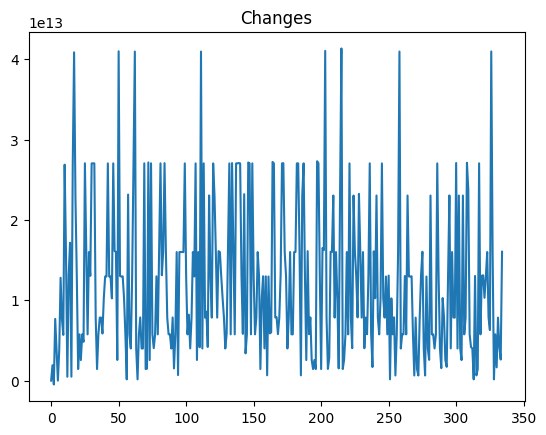

In [8]:
plt.plot(history_book['changes'])
plt.title("Changes")

Text(0.5, 1.0, 'Values')

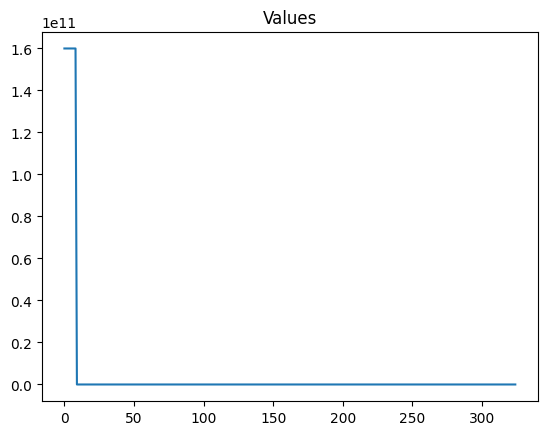

In [9]:
plt.plot(history_book['values'][10:])
plt.title("Values")

Text(0.5, 1.0, 'Temperature')

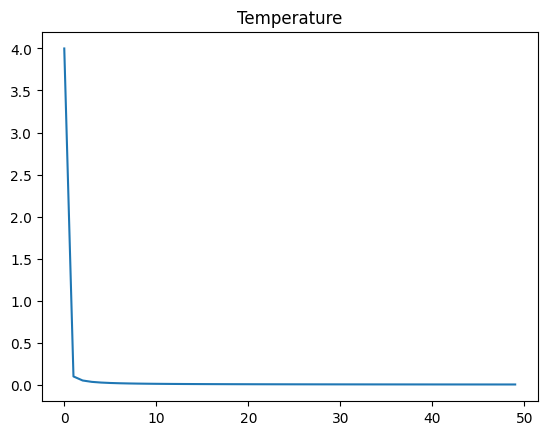

In [10]:
plt.plot(history_book['temperature'][:50])
plt.title("Temperature")